# Lab 10: Introduction to Least Squares Regression and the Normal Equations


In this lab you will implement the normal equations to estimate the parameters of a least squares regression model.  This lab will also help prepare you for the homework this week.

In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

from client.api.notebook import Notebook
ok = Notebook('lab10.ok')

Assignment: lab10
OK, version v1.13.9



In [2]:
np.set_printoptions(16)
# For instructor use only. Call this function to force refresh okpy tests
def refresh():
    import sys
    keys = [k for k in sys.modules.keys() if 'ok_tests' in k]
    for k in keys:
        del sys.modules[k]
    global ok
    ok = Notebook('lab09.ok')

In [4]:
ok.auth(force=True) # Change False to True if you are getting errors authenticating


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: 3PRWsVvkcH2F4SVE7SLILswr9Y8iKd
Successfully logged in as yining.jiang@berkeley.edu


### Creating the Data

Before we implement least squares linear regression in the cloud, let's first try implementing it within this notebook.

The following code downloads and plots a small toy dataset.

In [5]:
n = 100
p = 2
theta_true = np.array([-2.2, 1.0])
intercept = 4.0 
np.random.seed(42)
X = np.random.rand(n, p)*2.0 - 1.0
Y =  X @ theta_true + intercept + np.random.randn(n) * 0.2 

Take the following plot for a spin (literally).  Drag across the plot to spin it. Notice that we added the origin in red.

<IPython.core.display.Javascript object>


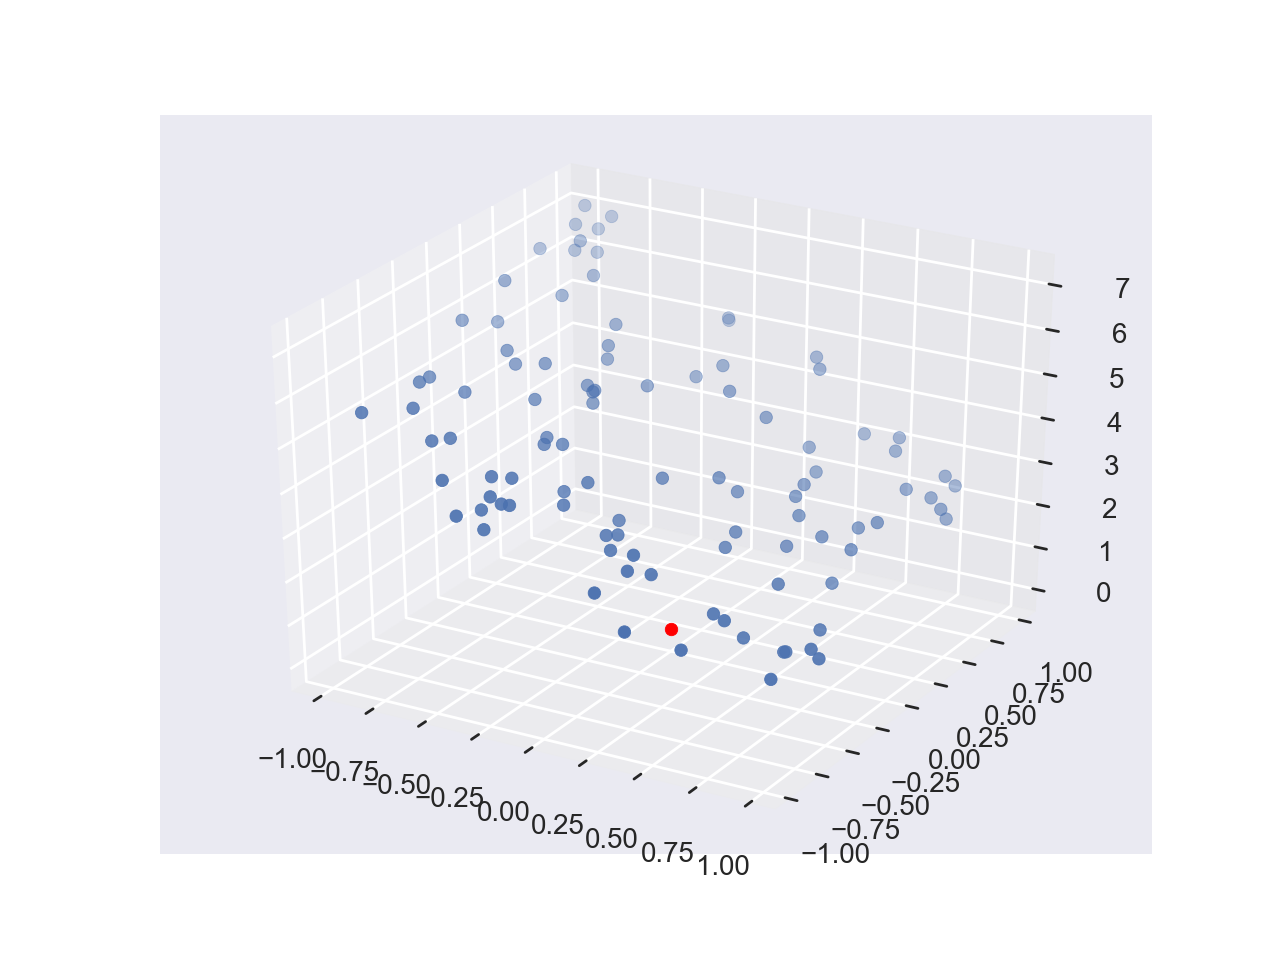

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# Added the origin 
ax.scatter([0],[0],[0], "o", color='red')

## Question 1

Recall from class that when we solve the normal equations we obtain the following estimate for our linear model:

$$
\hat{\theta{}} = (X^T X)^{-1} (X^T y)
$$

Complete the following function to compute the parameter estimate $\hat{\theta{}}$:

In [13]:
def least_squares_est(X, Y):
    """
    Solve the normal equations for the data X and Y.
    
        X: is the covariate matrix where each row is a record 
            and each column is a feature
        Y: is a vector containing the response values
    
    
    returns the solution to the normal equations
        inv(X.T @ X) @ (X.T @ Y)
    
    """
    # Read the documentation on this function
    from numpy.linalg import solve  
    return solve(X.T @ X,X.T @ Y)
    

Let's look at our estimate for the model parameters:

In [14]:
theta_hat = least_squares_est(X, Y)
theta_hat

array([-2.5883789105125623,  0.6953174687410614])

In [15]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/backups/jRG9Q5
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 2

Let's compute the correlation coefficient:

$$
r(x,y) = \frac{1}{n} \sum_{i=1}^n \frac{(x_i - \bar{x})}{\sigma_x}  * 
\frac{(y_i - \bar{y})}{\sigma_y}
$$

where:

$$
\sigma_x = \sqrt{\frac{1}{n}\sum_{i=1}^n (x-\bar{x})^2}
$$

and

$$
\sigma_y = \sqrt{\frac{1}{n}\sum_{i=1}^n (y-\bar{y})^2}
$$

Complete the following function:

In [16]:
def correlation(x, y):
    """
    Compute the correlation between the vectors x and y.
    
        x: a 1-dimensional vector of length n
        y: a 1-dimensional vector of length n
        
    return the correlation coefficient defined as above.
    """
    return np.mean((x-np.mean(x))*(y-np.mean(y))/(np.std(x)*np.std(y)))

In [17]:
_ = ok.grade('q02')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/backups/R64VXE
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



In the following we compute the correlation coefficient for `X[:,0]` and `X[:,1]`

In [18]:
correlation(X[:,0], Y)


-0.90739849873602996

In [19]:
correlation(X[:,1], Y)

0.43225082378347557

Which dimension has a stronger linear relationship?

In [20]:
q2_text = r"""X[:,0]"""

## Question 3

How well do we fit the data?  Let's examine our prediction error.  Finish the following function to compute the root mean squared error for a given theta:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\theta^T X_{i,:} - Y_i)^2}
$$

In [21]:
def rmse(theta, X, Y):
    """
    Compute the root mean squared error for the parameters theta
    
        theta: the estimated parameter vector
        X: the n by p covariate matrix
        Y: the n response values
    
    return the np.sqrt of the np.mean of X.dot(theta) - Y)^2 
    
    """
    return np.sqrt(np.mean((X.dot(theta) - Y)**2))

In [22]:
_ = ok.grade('q03')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/backups/n5M9jE
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Examining the error in our estimate $\hat{\theta{}}$

In [23]:
rmse(theta_true, X, Y)

4.0265834813515395

In [24]:
rmse(theta_hat, X, Y)

4.0162493700650055

Why might the estimator have a lower error than the true theta?

In [ ]:
q3_text = r"""your answer"""

## Question 4

Currently our model has the form:

$$
y = x_0  \theta_0 + x_1 \theta_1
$$

However we might want to add an additional intercept term:

$$
y = x_0  \theta_0 + x_1 \theta_1 + \mathbf{\theta_3}
$$

A common "trick" to add an extra constant term is to add an extra dimension (column) to our covariate matrix $X$:

$$
\textbf{addConst}(X) = 
\left(
\begin{matrix}
X_{0,0} & X_{0,1} & \color{red}{1.0} \\
X_{1,0} & X_{1,1} & \color{red}{1.0} \\
\ldots & \ldots & \ldots \\
X_{n,0} & X_{n,1} & \color{red}{1.0}
\end{matrix}
\right)
$$

Complete the following function.  You may want to use `np.hstack` and `np.ones((n,1))`.


In [25]:
np.hstack?

In [26]:
def add_const(X):
    """
    Add an extra column of 1.0 to n by p matrix.
    
        X: an n by p matrix
        return: an n by (p+1) matrix with the last column 
            containing 1.0
    """
    # Hint: use np.hstack
    return np.hstack((X,np.ones((X.shape[0],1))))

In [27]:
_ = ok.grade('q04')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/backups/YEk942
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 5

Use the above code to compute the parameters for the model:

$$
y = x_0  \theta_0 + x_1 \theta_1 + \mathbf{\theta_3}
$$


In [28]:
theta_hat_with_intercept = least_squares_est(add_const(X),Y)

In [29]:
_ = ok.grade('q05')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/backups/73vq3y
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Let's compare the estimator parameters with the true parameters (which we know because we fabricated the data).

In [30]:
theta_hat_with_intercept

array([-2.1661333225821933,  1.0354946032131185,  4.0238157334512685])

In [31]:
print("True theta_0 and theta_1", theta_true)
print("True intercept (theta_2)", intercept)

True theta_0 and theta_1 [-2.2000000000000002  1.                ]
True intercept (theta_2) 4.0


How did we do?  The numbers should be relatively close however there was noise in our data so it is possible that we are slightly off.  What about the RMSE?

In [32]:
print("RMSE with intercept term:", 
      rmse(theta_hat_with_intercept, add_const(X), Y))

RMSE with intercept term: 0.198129552796


In [33]:
print("RMSE without intercept:", 
      rmse(theta_hat, X, Y))

RMSE without intercept: 4.01624937007


That is a substantial improvement!

## Question 6

Uses `sns.distplot` to plot the distribution of the residual for our estimator with an intercept term.  Note if there is a any skew

<IPython.core.display.Javascript object>


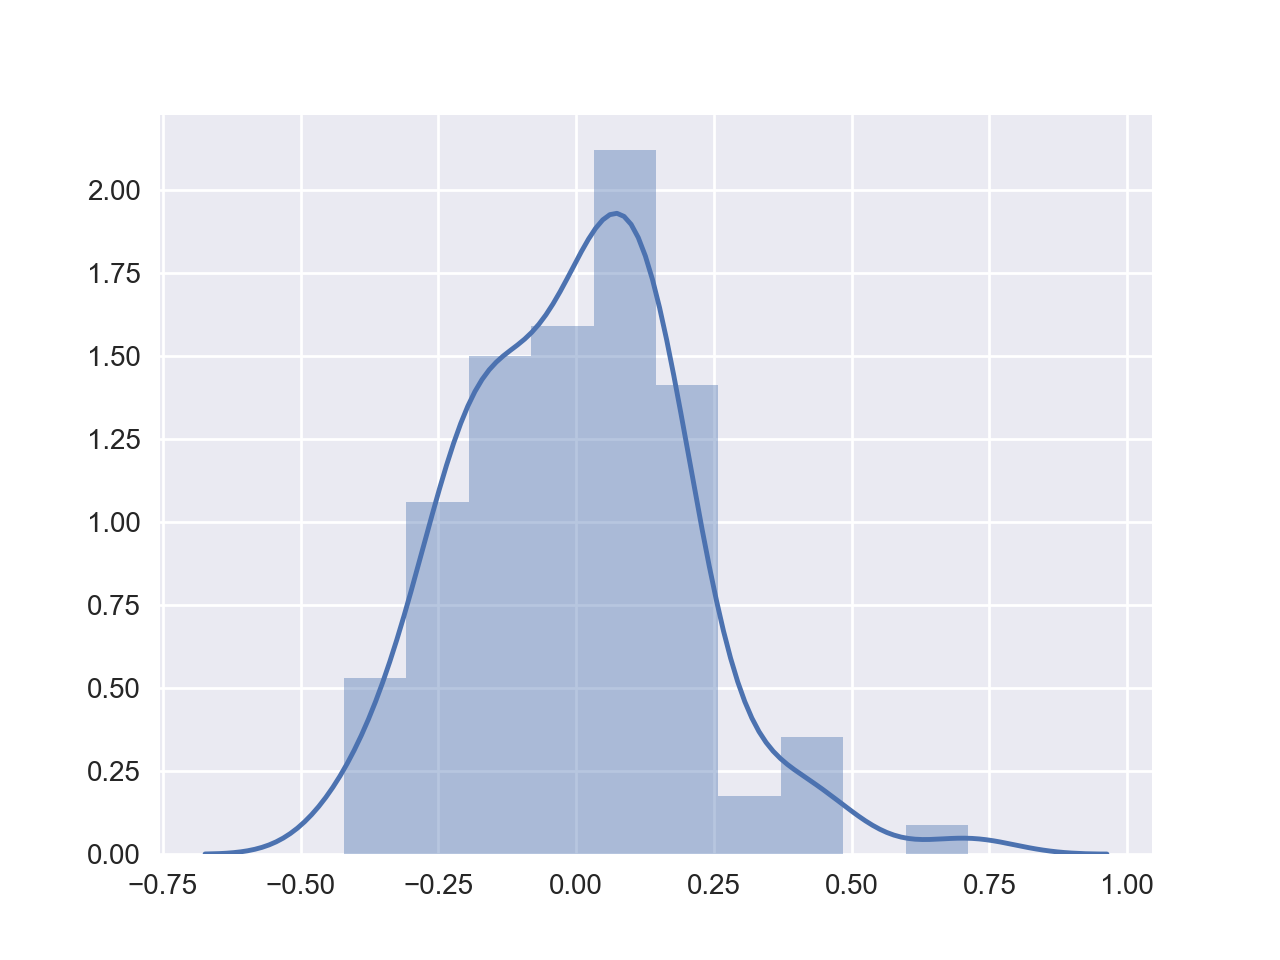

In [35]:
plt.figure(2)
resid = Y-add_const(X)@theta_hat_with_intercept
sns.distplot(resid)

## Question 7 

Calculate the sum of residual in question 6. Show that the sum is roughly zero.

In [36]:
sum_resid = np.sum(resid)

In [37]:
_ = ok.grade('q07')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/backups/gJBWZY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



# Submitting your assignment

Congratulations, you're done with this lab!

Run the next cell to run all the tests at once.

In [38]:
_ = ok.grade_all()    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [39]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Submit... 100% complete
Submission successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab10/submissions/yP1Wo7
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

